# [Data Cleaning & Exploratory Data Analysis](#'project_3/BavdaConsultingNLPDataCleaning')

## Table of Contents
   - [Exploratory Data Analysis](#Exploratory-Data-Analysis)
   - [Data Cleaning](#Data-Cleaning)
   - [Summary Statistics and Visualizations Created.](#Summary-Statistics-and-Visualizations-Created.)


#### Import statements are below

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm
from pprint import pprint

from nltk import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer =WordNetLemmatizer()
lemmatizer.lemmatize("cats")

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



#### Loading Datasets from Data Collection Notebook

In [2]:
dfg = pd.read_csv('./data/google818.csv')
dfa = pd.read_csv('./data/apple818.csv')

### [Exploratory Data Analysis](#Exploratory-Data-Analysis)

With this dataset and with Natural Language Processing in general, we venture on the difficult path of converting sentiment and language to 1's and 0's for a computer to distinguish. As a cautionary note, this is an extremely difficult process that must be recognized before any conclusion is reached. As described in the introduction and background, this is a multipart project. We will be taking polls and creating focus groups to tease out the best model for ANEC-NOC. Having explored the data, it seems likely that we will be able to distinguish between Apple and Google.  However, our stated goal of discovering who handles customer service best may be out of reach with the this natural language processing dataset. We may discover a few key words that will help us with the poll and focus groups. It may be that both handle customer service well as the outside research suggests, meaning the nuance of the type of customer may be difficult to translate. It may be that ANEC-NOCC has to decide who their target customers are more like, Google or Apple. As I explored the data, I checked variables through Unique Values, Descriptive Statistics, and Histograms. While there were several histograms, the layered histograms showed no variation in distribution, meaning the variable would not be predictive. The descriptive statistics also demonstrated this.  The posts remain the most important part of the analysis. Comments were predictive. Keeping the url was important for identification purposes.

target variable, columns mergedcheck for duplicates

In [3]:
dfa.shape

(3000, 84)

In [4]:
dfg.shape

(3000, 84)

In [5]:
dfa.columns

Index(['Unnamed: 0', 'all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id',
       'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked',
       'media_only', 'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'removed_by_category', 'retrieved_on', 'score', 'selftext',
       'send_replies', 'spoiler', 'stickied', 'subre

In [6]:
dfg.columns

Index(['Unnamed: 0', 'all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_richtext', 'link_flair_text_color', 'link_flair_type',
       'locked', 'media_only', 'no_follow', 'num_comments', 'num_crossposts',
       'over_18', 'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_subscribers',
       'subreddit_type', 'thumbnail', 'title', 'tot

#### Creating  the target variable, 'apple', where 1 indicate Apple whereas 0 indicates Google in each dataset. 

In [7]:
dfg['apple']=0

dfa['apple']=1



#### Check variables through Unique Values, Descriptive Statistics, and Histograms

In [8]:
dfg['spoiler'].unique(), dfa['spoiler'].unique(), dfg['spoiler'].describe(), dfa['spoiler'].describe()

(array([False,  True]),
 array([False,  True]),
 count      3000
 unique        2
 top       False
 freq       2986
 Name: spoiler, dtype: object,
 count      3000
 unique        2
 top       False
 freq       2995
 Name: spoiler, dtype: object)

In [9]:
dfg['author_cakeday'].unique(), dfa['author_cakeday'].unique()

(array([nan, True], dtype=object), array([nan, True], dtype=object))

(array(['all_ads', 'promo_adult_nsfw'], dtype=object),
 array(['all_ads', 'promo_adult_nsfw'], dtype=object),
 <AxesSubplot:>,
 <AxesSubplot:>)

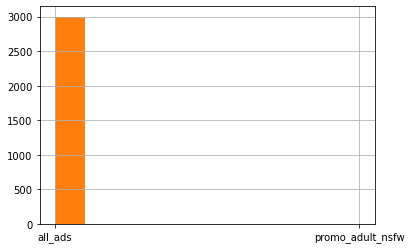

In [10]:
dfg['whitelist_status'].unique(), dfa['whitelist_status'].unique(), dfg['whitelist_status'].hist(), dfa['whitelist_status'].hist()

(<AxesSubplot:>, <AxesSubplot:>)

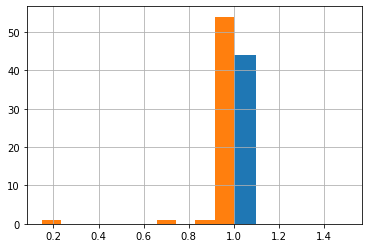

In [11]:
dfg['upvote_ratio'].hist(), dfa['upvote_ratio'].hist()

(array([   1,    3,    0,   65,    4,    6,    7,    5,   23, 1994,    2,
           8,   36, 1999,    9,  360,   46, 1254,   34,   31,   19, 1220,
          25,   21,  541,   11,   22,  898,  660,   13,   30,   14, 1739,
          18,   15,   82,   28, 1619,   60,   12,  157,  483,   27,  826,
          42, 1656,  170,  653, 2183, 1221, 1440,  255,  146,  135, 2149,
         476,   62,   16,  254, 1219, 1302,   38,   35,  494,  974,   79,
         216, 1857,  853,  271,  437,   17, 1455,   10,  629,   29,  449,
         171,   26, 2129,  521, 1169, 2344,  506,   32, 1433,  744,   63,
         475,  100, 1211,   72,  736,  162,  104, 1719, 1369, 1567, 2462,
          37, 5880,   24, 2316,  118,   78,  945,   20,   39,  904, 1283,
        1080, 1673,  115,   61,  942,  123,   96,  939,  185, 1579,   69,
         472,  142, 1725,   83,   67,  672,  131,   66,  582, 1629,  367,
          43, 1709, 1128,   55,   58,  187, 2472,   71,  224, 1781,   68,
        1728,   57, 2009, 2746,  828, 

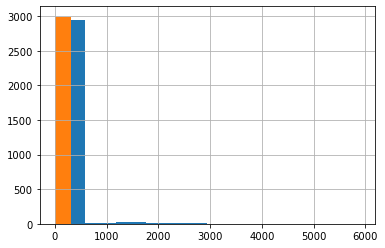

In [12]:
dfg['score'].unique(), dfa['score'].unique(), dfg['score'].hist(), dfa['score'].hist()

(array([6, 3]), array([6, 3]), <AxesSubplot:>, <AxesSubplot:>)

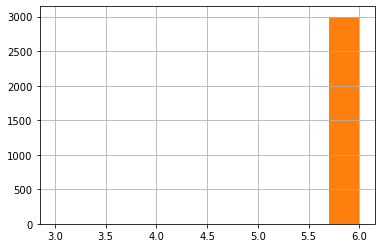

In [13]:
dfg['wls'].unique(), dfa['wls'].unique(),dfg['wls'].hist(), dfa['wls'].hist()

In [14]:
dfg['is_meta'].unique(), dfa['is_meta'].unique()

(array([False]), array([False]))

In [15]:
dfg['is_crosspostable'].unique(), dfa['is_crosspostable'].unique(),dfg['is_crosspostable'].describe(), dfa['is_crosspostable'].describe()

(array([ True, False]),
 array([False,  True]),
 count     3000
 unique       2
 top       True
 freq      1974
 Name: is_crosspostable, dtype: object,
 count      3000
 unique        2
 top       False
 freq       1870
 Name: is_crosspostable, dtype: object)

In [16]:
dfg['is_created_from_ads_ui'].unique(), dfa['is_created_from_ads_ui'].unique()

(array([False, nan], dtype=object), array([False, nan], dtype=object))

(array(['{}', "{'gid_1': 2}", "{'gid_3': 1}", "{'gid_2': 2}",
        "{'gid_2': 1}", "{'gid_1': 1}"], dtype=object),
 array(['{}', "{'gid_3': 1}", "{'gid_2': 1}"], dtype=object),
 <AxesSubplot:>,
 <AxesSubplot:>)

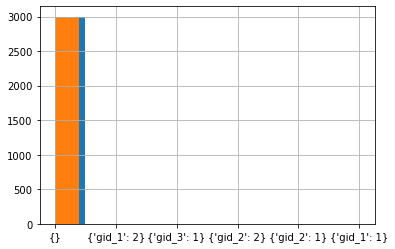

In [17]:
dfg['gildings'].unique(), dfa['gildings'].unique(), dfg['gildings'].hist(), dfa['gildings'].hist()

In [18]:
dfg['domain'].unique(), dfa['domain'].unique()

(array(['reddit.com', 'newindia360.com', 'self.google', 'youtu.be',
        'antiviruscustomercareservice.com', 'techfans.co.uk', 'i.redd.it',
        'self.GoogleFi', 'alltfn.com', 'syrow.com', 'techpost.io',
        'cnbc.com', 'techcrunch.com', 'link.medium.com', 'androidhire.com',
        'youtube.com', 'popularmechanics.com', 'mangocityit.com',
        'edition.cnn.com', 'issuu.com', 'store.outrightcrm.com',
        'skeduhub.blogspot.com', 'i.imgur.com', 'around360tome.com',
        'techyfest.com',
        '/r/google/comments/cemu9w/no_more_google_ads_maybe/',
        'theevoking.com', 'zdnet.com', 'businessinsider.sg',
        'buyreviewservice.com', 'bbc.com', 'cnet.com', 'unlikekinds.com',
        'technext.me', 'iamcheated.indianmoney.com', 'garmincare.com',
        'pandaily.com', 'globebusinesscenter.com', 'breitbart.com',
        'catchmyblogs.com', 'droid-life.com', 'wired.com',
        'downforeveryoneorjustme.com', 'cityfalcon.com',
        'finance.yahoo.com', '9to5go

In [19]:
dfg['contest_mode'].unique(), dfa['contest_mode'].unique()

(array([False]), array([False]))

In [20]:
dfg['can_mod_post'].unique(), dfa['can_mod_post'].unique()

(array([False]), array([False]))

In [21]:
dfg['awarders'].unique(), dfa['awarders'].unique()

(array(['[]', nan], dtype=object), array(['[]'], dtype=object))

In [22]:
dfg['author_fullname'].unique(), dfa['author_fullname'].unique()

(array(['t2_jc4zf', 't2_d4b6ghho', 't2_d9zs568w', ..., 't2_18rt9o3e',
        't2_zb9ygv9', 't2_wsuge'], dtype=object),
 array(['t2_x0xgx', 't2_a0677f16', 't2_d2vdfudy', ..., 't2_3w511gw6',
        't2_12m5g0', 't2_57ri43rd'], dtype=object))

In [23]:
dfg['author_flair_type'].unique(), dfa['author_flair_type'].unique()

(array(['text', nan], dtype=object),
 array(['text', 'richtext', nan], dtype=object))

In [24]:
dfg['author_flair_text'].unique(), dfa['author_flair_text'].unique()

(array([nan]), array([nan, 'Aaron'], dtype=object))

In [25]:
dfg['author_flair_richtext'].unique(), dfa['author_flair_richtext'].unique()

(array(['[]', nan], dtype=object),
 array(['[]', "[{'e': 'text', 't': 'Aaron'}]", nan], dtype=object))

In [26]:
dfg['author_flair_css_class'].unique(), dfa['author_flair_css_class'].unique()

(array([nan]), array([nan, 'moderator'], dtype=object))

In [27]:
dfg['author'].unique(), dfa['author'].unique()

(array(['chazjamie', 'Reasonable-Art7398', 'instantsupports', ...,
        'Clash-of-Youtube', 'Nikoz1745', 'ashrafshref185'], dtype=object),
 array(['dealmaker07', 'Aromatic-Attorney-86', 'menarefigs', ...,
        'Tralewa', 'kaktus1389', 'mrgeeksquad'], dtype=object))

In [28]:
dfg['allow_live_comments'].unique(), dfa['allow_live_comments'].unique(), 

(array([False, nan], dtype=object), array([False,  True]))

In [29]:
dfg['Unnamed: 0'].unique(), dfa['Unnamed: 0'].unique()

(array([   0,    1,    2, ..., 2997, 2998, 2999]),
 array([   0,    1,    2, ..., 2997, 2998, 2999]))

#### Relevant columns from both identified, merged, and checked

In [30]:
dfg=dfg[['created_utc', 'apple', 'selftext', 'full_link', 'url', 'id', 'num_comments', 'title', 'num_crossposts']]
dfa=dfa[['created_utc', 'apple', 'selftext', 'full_link', 'url', 'id', 'num_comments', 'title', 'num_crossposts']]

In [31]:
results=[dfa, dfg]
df=pd.concat(results, ignore_index=True)
df

,created_utc,apple,selftext,full_link,url,id,num_comments,title,num_crossposts
0,1629169721,1,[removed],https://www.reddit.com/r/apple/comments/p5vi7i...,https://www.reddit.com/r/apple/comments/p5vi7i...,p5vi7i,0,Citizens one + Apple customer service issues,0
1,1628782441,1,So a while back I heard Apple might be coming ...,https://www.reddit.com/r/apple/comments/p329rb...,https://www.reddit.com/r/apple/comments/p329rb...,p329rb,2,Apple Wi-Fi rumors,0
2,1627573674,1,[removed],https://www.reddit.com/r/apple/comments/ou02cq...,https://www.reddit.com/r/apple/comments/ou02cq...,ou02cq,2,Does Apple Outsource All Customer Service Over...,0
3,1626632988,1,[removed],https://www.reddit.com/r/apple/comments/omwb6q...,https://www.reddit.com/r/apple/comments/omwb6q...,omwb6q,0,This Apple customer service rep. ❤️,0
4,1625171854,1,[removed],https://www.reddit.com/r/apple/comments/obun7k...,https://www.reddit.com/r/apple/comments/obun7k...,obun7k,1,How can I communicate with customer service?,0
...,...,...,...,...,...,...,...,...,...
5995,1558290823,0,NaN,https://www.reddit.com/r/google/comments/bqkad...,https://www.quora.com/Why-do-Yelp-reviews-almo...,bqkadd,1,(4) Anochai FDM's answer to Why do Yelp review...,0
5996,1558287699,0,NaN,https://www.reddit.com/r/google/comments/bqjol...,https://i.redd.it/wotab45vf7z21.png,bqjolk,26,Anyone know how to fix this dark mode issue. I...,0
5997,1558286521,0,NaN,https://www.reddit.com/r/google/comments/bqjgk...,https://www.youtube.com/attribution_link?a=09I...,bqjgk3,0,Is The Google Home Mini Worth It In 2019?,0
5998,1558281690,0,"Hi, my name is Nikita and I from Russia. I jus...",https://www.reddit.com/r/google/comments/bqijz...,https://www.reddit.com/r/google/comments/bqijz...,bqijzc,1,Need help (Software engineers),0


In [32]:
#remove outliers

### [Data Cleaning](#Data-Cleaning)

This section goes hand and hand with Exploratory Data Analysis and Preprocessing. While this is not a linear process, I have attempted to make it as close as possible. Several steps were taken. Duplicates were removed. 'Removed' and 'Deleted' Posts were excised as these are missing values. One dummy variable was added. There were Nan's that amounted to three observations. These missing values were dropped. There are some short posts that are outliers that appear to be out of the norm. They have not been removed for two reasons. First, the use of a swear word is descriptive even if is just that. Second, the TFIDH transformer has a maximum feature depth, maximum document frequency, and a minimum document frequency. When these posts are converted into matrices, the outliers, if they are that, will be eliminated from the calculation. These features will also be used in part to cancel out the effect of buzzwords such as product or company name.  This way we can distinguish customer service from product names.

In [33]:
df[df.duplicated(subset='id')].id.value_counts()[:2]


Series([], Name: id, dtype: int64)

In [34]:
df[df.duplicated(subset='selftext')].selftext.value_counts()[:2]

[removed]    2169
[deleted]      18
Name: selftext, dtype: int64

In [35]:
df.drop_duplicates(subset=['selftext'], keep='first', inplace=True)
df

,created_utc,apple,selftext,full_link,url,id,num_comments,title,num_crossposts
0,1629169721,1,[removed],https://www.reddit.com/r/apple/comments/p5vi7i...,https://www.reddit.com/r/apple/comments/p5vi7i...,p5vi7i,0,Citizens one + Apple customer service issues,0
1,1628782441,1,So a while back I heard Apple might be coming ...,https://www.reddit.com/r/apple/comments/p329rb...,https://www.reddit.com/r/apple/comments/p329rb...,p329rb,2,Apple Wi-Fi rumors,0
21,1617568289,1,It has been my experience that Apple’s support...,https://www.reddit.com/r/apple/comments/mk47vq...,https://www.reddit.com/r/apple/comments/mk47vq...,mk47vq,227,Have anyone noticed a massive drop off in Supp...,0
25,1612136462,1,I just have to get this off my chest because I...,https://www.reddit.com/r/apple/comments/l9p9ws...,https://www.reddit.com/r/apple/comments/l9p9ws...,l9p9ws,22,Apple isn't listening so I thought I'd just tr...,0
29,1608925887,1,"Hello, I am a student and use Pearson for Stat...",https://www.reddit.com/r/apple/comments/kk4vv2...,https://www.reddit.com/r/apple/comments/kk4vv2...,kk4vv2,2,Upgrade operating system message,0
...,...,...,...,...,...,...,...,...,...
5974,1558313935,0,For many months Timeline has been flakey on my...,https://www.reddit.com/r/google/comments/bqola...,https://www.reddit.com/r/google/comments/bqola...,bqola0,0,Google Timeline Issue,0
5976,1558313021,0,I hope I live long enough to see Bill and Hill...,https://www.reddit.com/r/google/comments/bqofm...,https://www.reddit.com/r/google/comments/bqofm...,bqofm2,0,Bill and Hillary Clinton,0
5978,1558307388,0,[https://support.google.com/websearch/thread/...,https://www.reddit.com/r/google/comments/bqnh3...,https://www.reddit.com/r/google/comments/bqnh3...,bqnh3i,0,Safesearch broken,0
5981,1558305003,0,"Hi\n\nI'm trying to make a list of ""flip-a-swi...",https://www.reddit.com/r/google/comments/bqn1h...,https://www.reddit.com/r/google/comments/bqn1h...,bqn1hz,0,"Help me make a list of ""flip-a-switch"" feature...",0


#### Checked for removed and deleted posts. Converted to NaN's

In [36]:
df.selftext.replace({'[removed]': np.nan, '[deleted]':np.nan}, inplace = True)
df

,created_utc,apple,selftext,full_link,url,id,num_comments,title,num_crossposts
0,1629169721,1,NaN,https://www.reddit.com/r/apple/comments/p5vi7i...,https://www.reddit.com/r/apple/comments/p5vi7i...,p5vi7i,0,Citizens one + Apple customer service issues,0
1,1628782441,1,So a while back I heard Apple might be coming ...,https://www.reddit.com/r/apple/comments/p329rb...,https://www.reddit.com/r/apple/comments/p329rb...,p329rb,2,Apple Wi-Fi rumors,0
21,1617568289,1,It has been my experience that Apple’s support...,https://www.reddit.com/r/apple/comments/mk47vq...,https://www.reddit.com/r/apple/comments/mk47vq...,mk47vq,227,Have anyone noticed a massive drop off in Supp...,0
25,1612136462,1,I just have to get this off my chest because I...,https://www.reddit.com/r/apple/comments/l9p9ws...,https://www.reddit.com/r/apple/comments/l9p9ws...,l9p9ws,22,Apple isn't listening so I thought I'd just tr...,0
29,1608925887,1,"Hello, I am a student and use Pearson for Stat...",https://www.reddit.com/r/apple/comments/kk4vv2...,https://www.reddit.com/r/apple/comments/kk4vv2...,kk4vv2,2,Upgrade operating system message,0
...,...,...,...,...,...,...,...,...,...
5974,1558313935,0,For many months Timeline has been flakey on my...,https://www.reddit.com/r/google/comments/bqola...,https://www.reddit.com/r/google/comments/bqola...,bqola0,0,Google Timeline Issue,0
5976,1558313021,0,I hope I live long enough to see Bill and Hill...,https://www.reddit.com/r/google/comments/bqofm...,https://www.reddit.com/r/google/comments/bqofm...,bqofm2,0,Bill and Hillary Clinton,0
5978,1558307388,0,[https://support.google.com/websearch/thread/...,https://www.reddit.com/r/google/comments/bqnh3...,https://www.reddit.com/r/google/comments/bqnh3...,bqnh3i,0,Safesearch broken,0
5981,1558305003,0,"Hi\n\nI'm trying to make a list of ""flip-a-swi...",https://www.reddit.com/r/google/comments/bqn1h...,https://www.reddit.com/r/google/comments/bqn1h...,bqn1hz,0,"Help me make a list of ""flip-a-switch"" feature...",0


#### There is such a small amount of NaN's  so dropped.

In [37]:
df.isnull().sum()

created_utc       0
apple             0
selftext          3
full_link         0
url               0
id                0
num_comments      0
title             0
num_crossposts    0
dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
df

,created_utc,apple,selftext,full_link,url,id,num_comments,title,num_crossposts
1,1628782441,1,So a while back I heard Apple might be coming ...,https://www.reddit.com/r/apple/comments/p329rb...,https://www.reddit.com/r/apple/comments/p329rb...,p329rb,2,Apple Wi-Fi rumors,0
21,1617568289,1,It has been my experience that Apple’s support...,https://www.reddit.com/r/apple/comments/mk47vq...,https://www.reddit.com/r/apple/comments/mk47vq...,mk47vq,227,Have anyone noticed a massive drop off in Supp...,0
25,1612136462,1,I just have to get this off my chest because I...,https://www.reddit.com/r/apple/comments/l9p9ws...,https://www.reddit.com/r/apple/comments/l9p9ws...,l9p9ws,22,Apple isn't listening so I thought I'd just tr...,0
29,1608925887,1,"Hello, I am a student and use Pearson for Stat...",https://www.reddit.com/r/apple/comments/kk4vv2...,https://www.reddit.com/r/apple/comments/kk4vv2...,kk4vv2,2,Upgrade operating system message,0
31,1607465909,1,"As of today, I dropped my 2018 15"" MacBook Pro...",https://www.reddit.com/r/apple/comments/k9eg93...,https://www.reddit.com/r/apple/comments/k9eg93...,k9eg93,0,For anyone who recently got a logic board repl...,0
...,...,...,...,...,...,...,...,...,...
5974,1558313935,0,For many months Timeline has been flakey on my...,https://www.reddit.com/r/google/comments/bqola...,https://www.reddit.com/r/google/comments/bqola...,bqola0,0,Google Timeline Issue,0
5976,1558313021,0,I hope I live long enough to see Bill and Hill...,https://www.reddit.com/r/google/comments/bqofm...,https://www.reddit.com/r/google/comments/bqofm...,bqofm2,0,Bill and Hillary Clinton,0
5978,1558307388,0,[https://support.google.com/websearch/thread/...,https://www.reddit.com/r/google/comments/bqnh3...,https://www.reddit.com/r/google/comments/bqnh3...,bqnh3i,0,Safesearch broken,0
5981,1558305003,0,"Hi\n\nI'm trying to make a list of ""flip-a-swi...",https://www.reddit.com/r/google/comments/bqn1h...,https://www.reddit.com/r/google/comments/bqn1h...,bqn1hz,0,"Help me make a list of ""flip-a-switch"" feature...",0


In [40]:
df['selftext']=df['selftext'].str.lower()
df['title']=df['title'].str.lower()

In [41]:
df['selftext'].head(20)

1      so a while back i heard apple might be coming ...
21     it has been my experience that apple’s support...
25     i just have to get this off my chest because i...
29     hello, i am a student and use pearson for stat...
31     as of today, i dropped my 2018 15" macbook pro...
51     first-time apple customer here.\n\nmy laptop w...
53     as you may have seen, i sent the following twe...
57     in february, i decided to finally upgrade my i...
59     on march 23rd i broke the screen on my 11max p...
63     i just had one of the worst customer service e...
64     dell's u3818dw and u3419w monitors violate usb...
66     i was a genius for 3yrs, no longer am one, but...
70     here is the video of messages \nhttps://www.re...
71     hi there! this year my goal was to get a job w...
72     last year apple had a company wide profit marg...
74     i recently received a hand-me-down 2015 macboo...
80     anyone have macbook air 2019 bluetooth keyboar...
82     i really liked the new 1

#### Below, 'title' and 'selftext' are combined to make the matrix transformation easier

In [42]:
df.title=df.title.apply(lambda x: x + '.')
df['text']=df.title + ' ' + df.selftext
df.reset_index(inplace=True)



### [Summary Statistics and Visualizations Created.](#Summary-Statistics-and-Visualizations-Created.)

Below for the few numeric variables included, the descriptive statistics are shown. The histogram show there may be little predictive power. The correlation heatmap concurs. The next notebook also contains visualizations.

In [43]:
df.describe()

,index,created_utc,apple,num_comments,num_crossposts
count,1297.000000,1.297000e+03,1297.000000,1297.000000,1297.0
mean,3140.713955,1.569593e+09,0.468003,4.922899,0.0
std,1568.202722,9.699154e+06,0.499168,29.242973,0.0
min,1.000000,1.558282e+09,0.000000,0.000000,0.0
25%,1807.000000,1.560985e+09,0.000000,0.000000,0.0
50%,3084.000000,1.563473e+09,0.000000,0.000000,0.0
75%,4426.000000,1.577296e+09,1.000000,1.000000,0.0
max,5998.000000,1.628782e+09,1.000000,531.000000,0.0


<AxesSubplot:>

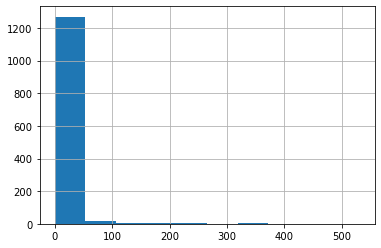

In [44]:
df.num_comments.hist()

In [45]:
df.corr()[['apple']][(df.corr()['apple'].sort_values().abs() > .10)],

<ipython-input-45-39b6bc70d929>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.corr()[['apple']][(df.corr()['apple'].sort_values().abs() > .10)],


(                apple
 index       -0.846493
 created_utc  0.781482
 apple        1.000000,)

[Text(0.5, 1.0, 'Correlation with Companies')]

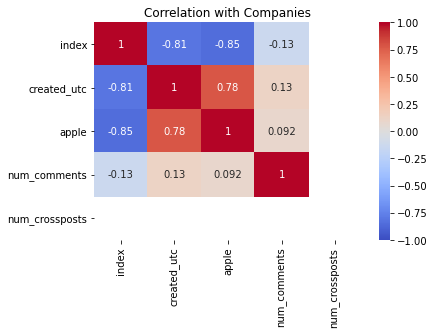

In [46]:
ax=sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
ax.set(title = "Correlation with Companies")

#### Data Types checked to ensure modeling success. There is also a csv filed that is saved for the next notebook.

In [47]:
df.dtypes

index              int64
created_utc        int64
apple              int64
selftext          object
full_link         object
url               object
id                object
num_comments       int64
title             object
num_crossposts     int64
text              object
dtype: object

In [48]:
#df.to_csv('data/modeling.csv')

### Exploratory Data Analysis is continued in the Modeling section. Preprocessing, Modeling, Exploratory Data Analysis, and Data cleaning go hand in hand.There are multiple iterations in the data science process, and therefore, this is not completely linear.  I have attempted to create a linear flow. Please click on the link below to continue. 
### [Modeling, Data Visualization, and Conclusions Notebook](/BavdaConsultingNLPModelingConclusions)